# Subtraction of coherent signals (Huddle test)

Authors: Artem Basalaev <artemDOTbasalaev@pmDOTme>, Pooya Saffarieh <p.saffarieh@nikhefDOTnl>

<font color=gray> 
The example is based on code originally developed by Nathan A. Holland, Pooya Saffarieh, Brian Lantz, Conor Mow-Lowry, the original algorithm is described in <a href=https://doi.org/10.1063/1.5000592>https://doi.org/10.1063/1.5000592</a>. The code is adapted for Spicypy by Artem Basalaev and Christian Darsow-Fromm.
</font>

If not done already, install spicypy (uncomment the line below):

In [1]:
# pip install spicypy

Imports, plot settings

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,9)
import pandas as pd
import numpy as np
from spicypy.signal.time_series import TimeSeries

Create inputs: signals with coinciding frequencies + some random noise

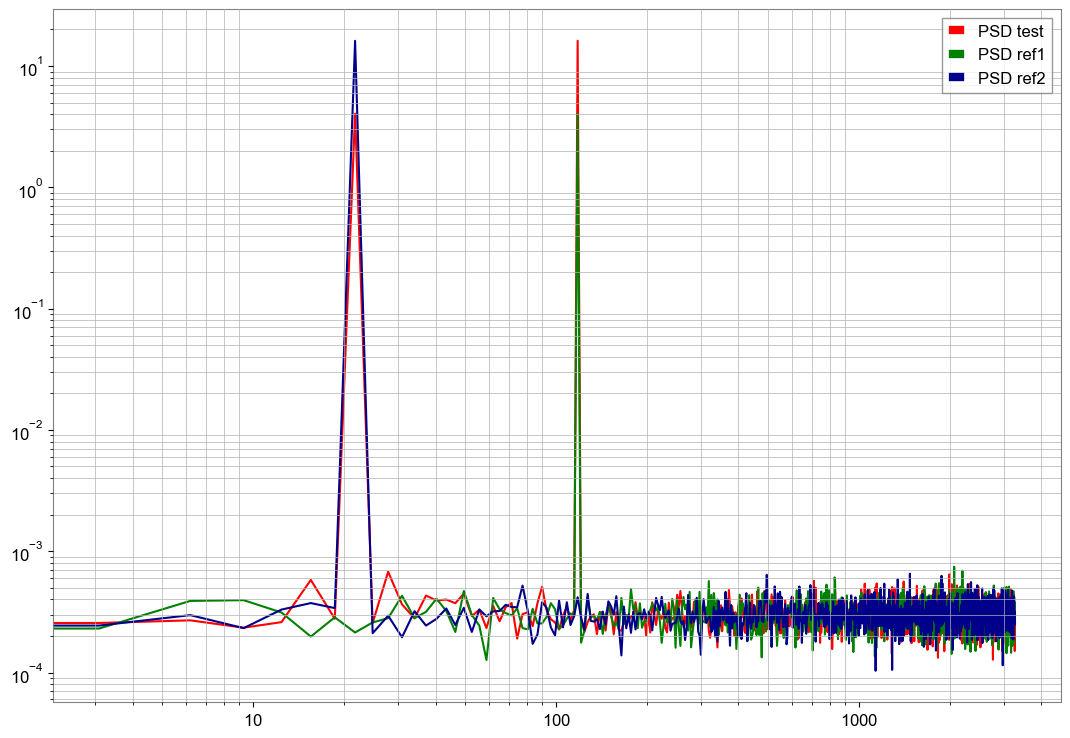

In [10]:
# define common frequencies and other parameters
f1 = 119
f2 = 23
samples = 2**16
np.random.seed(0)
t = np.linspace(0, 10, samples)

# test signal: both frequencies + some noise
test_sig = 10*np.sin(2*np.pi*f1*t) + 5*np.sin(2*np.pi*f2*t) + np.random.normal(0, size=samples)
# reference signal 1: only f1 + some noise
ref_sig1 = 5*np.sin(2*np.pi*f1*t) + np.random.normal(0, size=samples)
# reference signal 2: only f2 + some noise
ref_sig2 = 10*np.sin(2*np.pi*f2*t) + np.random.normal(0, size=samples)

# create TimeSeries and calculate spectra
test_ts = TimeSeries(test_sig, times = t)
test_psd = test_ts.psd(method='daniell', number_averages=31)
ref_ts1 = TimeSeries(ref_sig1, times = t)
ref_psd1 = ref_ts1.psd(method='daniell', number_averages=31)
ref_ts2 = TimeSeries(ref_sig2, times = t)
ref_psd2 = ref_ts2.psd(method='daniell', number_averages=31)

# make a plot
plt.plot(test_psd, label='PSD test', color='red')
plt.plot(ref_psd1, label='PSD ref1', color='green')
plt.plot(ref_psd2, label='PSD ref2', color='darkblue')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper right')
plt.minorticks_on = True
plt.grid(which = 'both', axis = 'both')

## Calculate residual PSD - coherent subtraction of the two references

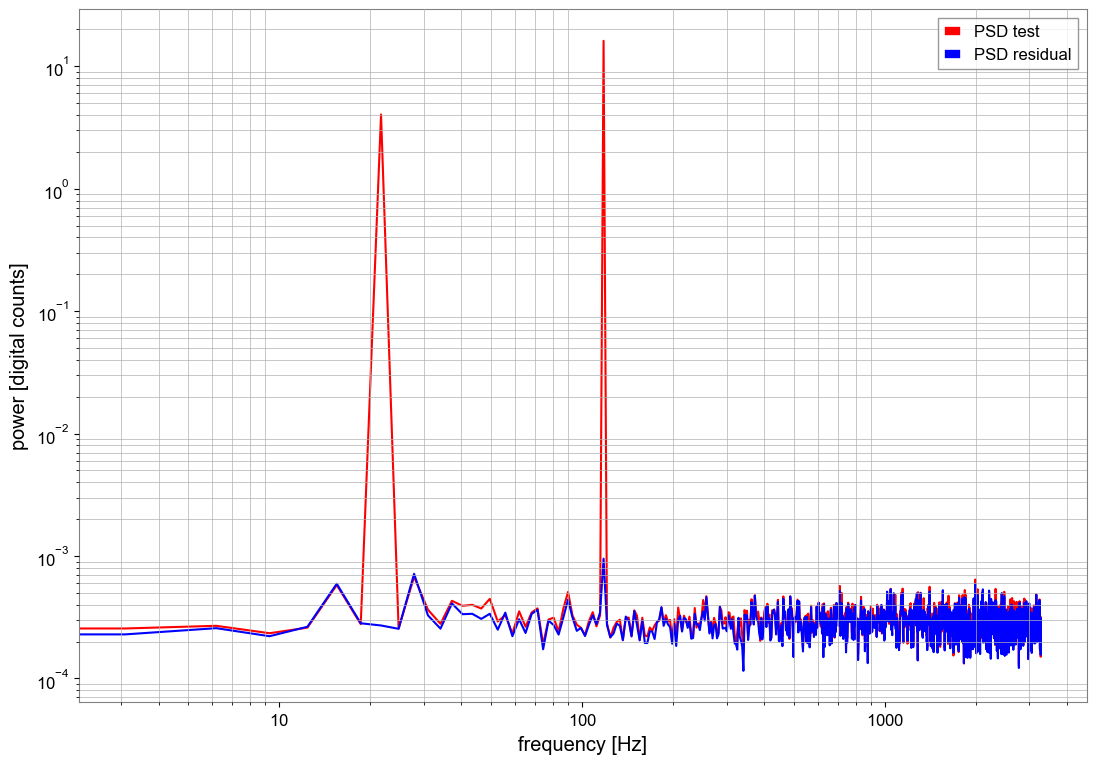

In [4]:
res_psd = test_ts.coherent_subtract([ref_ts1, ref_ts2], number_averages=31)
plt.plot(test_psd, color='red', label='PSD test')
plt.plot(res_psd, color='blue', label='PSD residual')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('power [digital counts]')
plt.legend(loc='upper right')
plt.minorticks_on = True
plt.grid(which = 'both', axis = 'both')

## Calculate residual CSD (from two input signals)

It is also possible to use `coherent_subtraction` function and specify test and reference signals directly, for example to use _two_ test signals with subtraction performed from CSD(test1,test2)

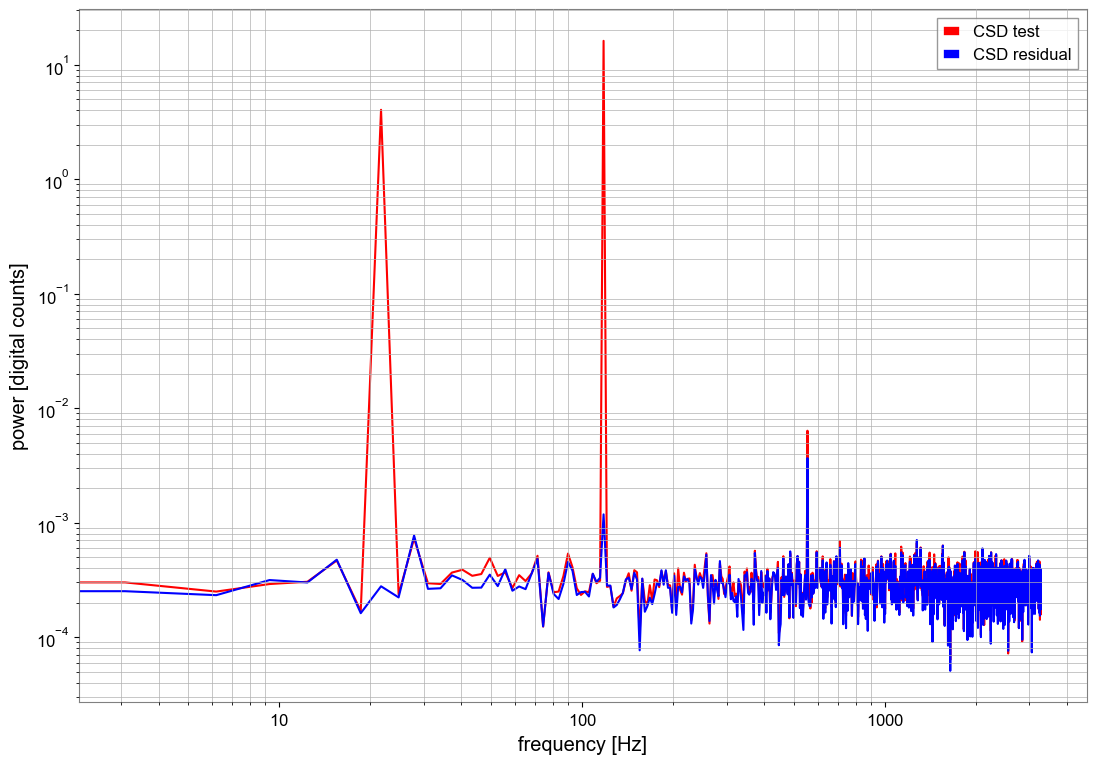

In [14]:
# specify second test signal
# by adding one more frequency + some noise
f3 = 555
test_sig2 = test_sig + 3*np.sin(2*np.pi*f3*t) + np.random.normal(0, size=samples)
test_ts2 = TimeSeries(test_sig2, times = t)
test_csd = test_ts.csd(test_ts2, method='daniell', number_averages=31)
# perform coherent subtraction

from spicypy.signal.coherent_subtraction import coherent_subtraction
res_csd = coherent_subtraction(test_ts, test_ts2, [ref_ts1, ref_ts2], number_averages=31)
plt.plot(test_csd, color='red', label='CSD test')
plt.plot(res_csd, color='blue', label='CSD residual')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('power [digital counts]')
plt.legend(loc='upper right')
plt.minorticks_on = True
plt.grid(which = 'both', axis = 'both')